## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [3]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [4]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

bitstamp = Path('./Resources/bitstamp.csv')

bitstamp_df = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp_df.head())


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [6]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

coinbase = Path('./Resources/coinbase.csv')

coinbase_df = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)


In [7]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase_df.tail())


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df = bitstamp_df.dropna()


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df['Close'] = bitstamp_df['Close'].str.replace('$', '', regex=False)
bitstamp_df['Close']

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp_df['Close'] = bitstamp_df['Close'].astype('float')
bitstamp_df['Close'].dtype

dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
# remove duplicate
bitstamp_df = bitstamp_df.drop_duplicates()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
# replace or drop all NaNs or missing values in the DataFrame
coinbase_df = coinbase_df.dropna()

# Use the str.replace function to remove the dollar sign, $
coinbase_df['Close'] = coinbase_df['Close'].str.replace('$', '', regex=False)
coinbase_df['Close']

# Convert the Close data type to a float
coinbase_df['Close'] = coinbase_df['Close'].astype('float')
coinbase_df['Close'].dtype

# Review the data for duplicate values, and drop them if necessary
# remove duplicate
coinbase_df = coinbase_df.drop_duplicates()


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [13]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
#selected all rows and column 3 (close)
bitstamp_sliced = bitstamp_df.loc[:,['Close']]

# Review the first five rows of the DataFrame
bitstamp_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:,['Close']]
#index

# Review the first five rows of the DataFrame
coinbase_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [15]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [16]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

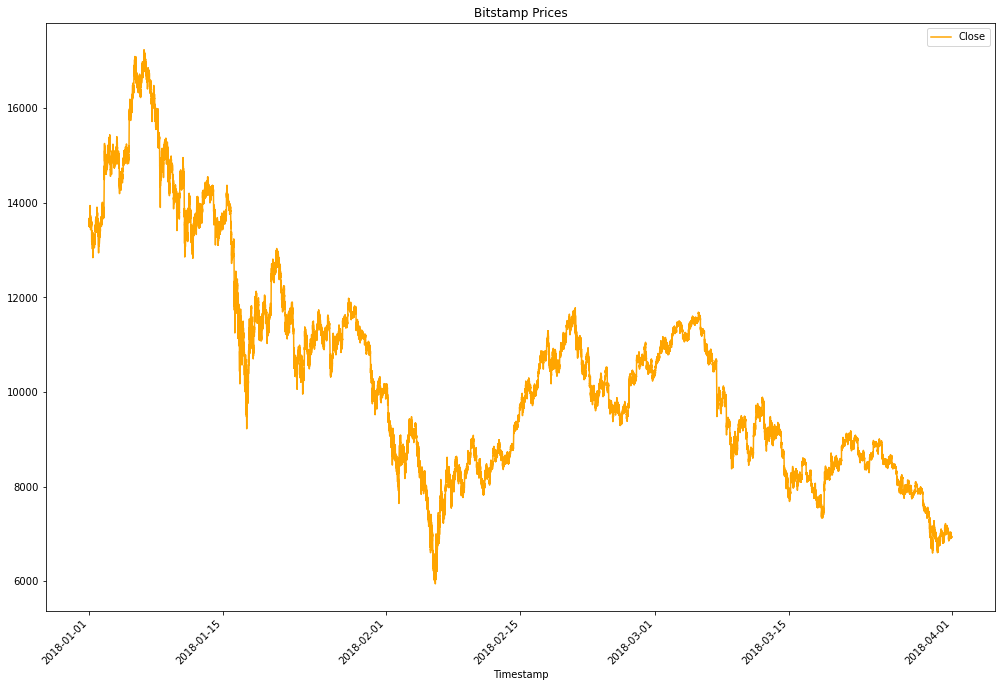

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.loc['2018-01-01':'2018-03-31'].plot(
  figsize=(17,12), title="Bitstamp Prices", rot=45, color="orange", label="Timestamp")


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

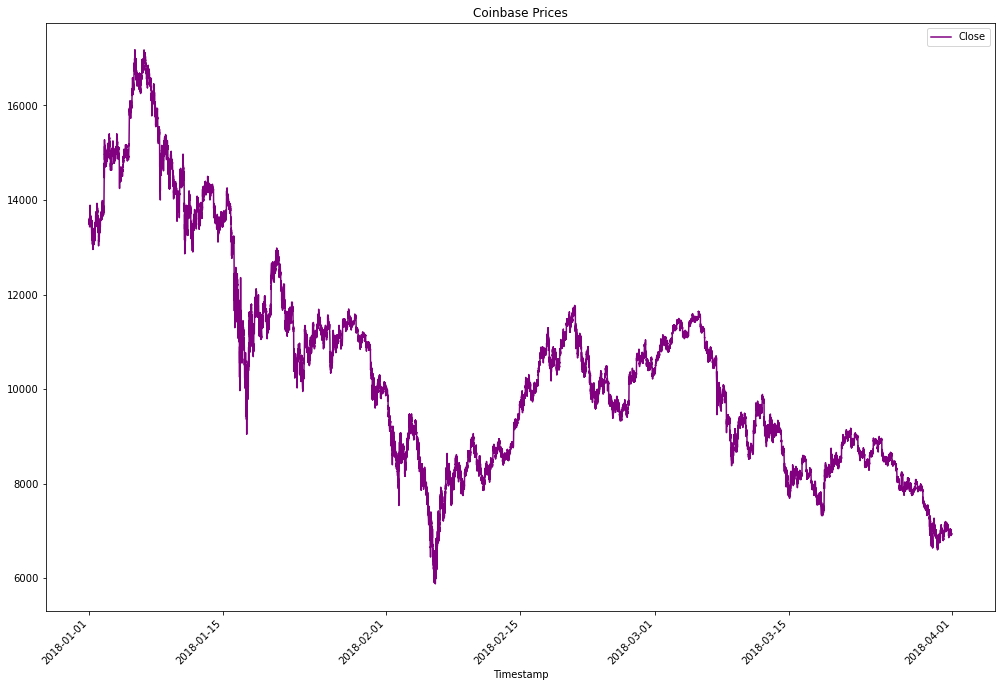

In [20]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.loc['2018-01-01':'2018-03-31'].plot(
  figsize=(17,12), title="Coinbase Prices", rot=45, color="purple", label="Timestamp")

<AxesSubplot:xlabel='Timestamp'>

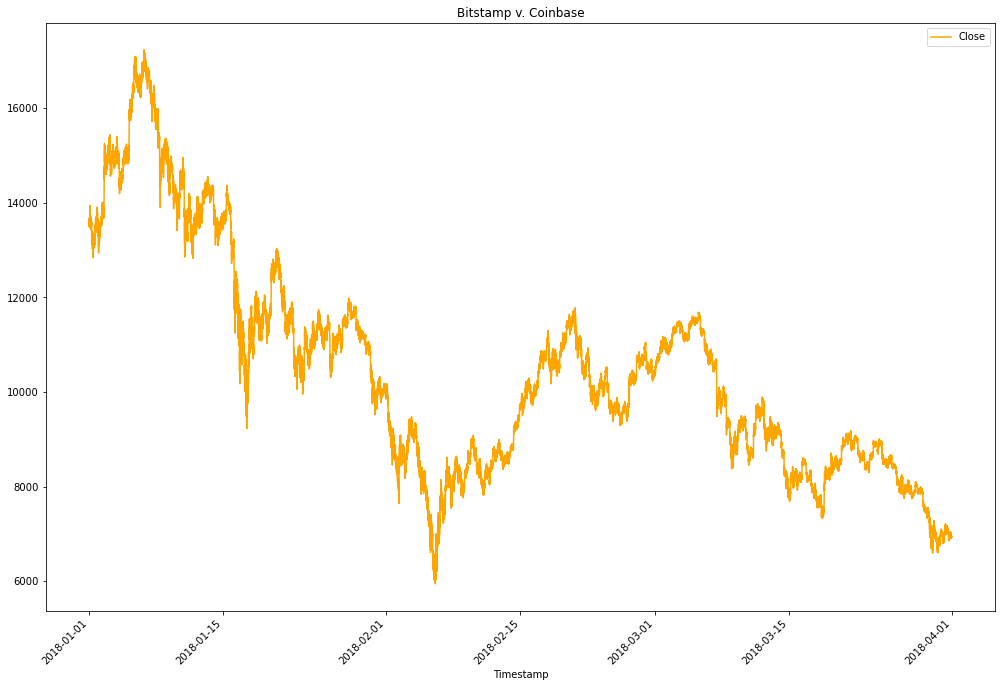

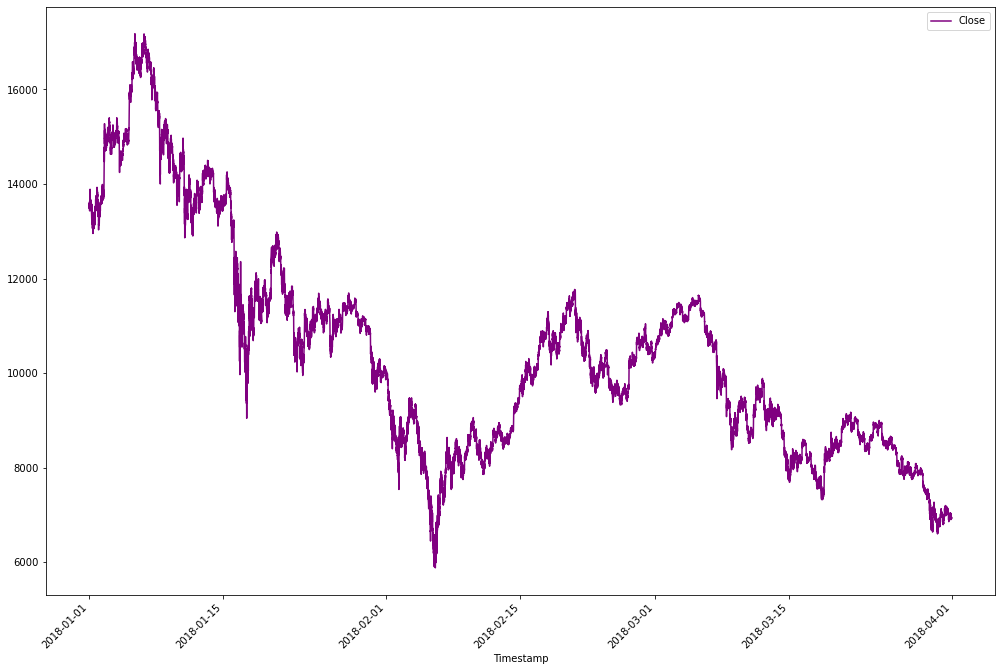

In [22]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
#plots are supposed to overlay but when I re-ran code, the plots separated due to matplotlib issue
bitstamp_sliced.loc['2018-01-01':'2018-03-31'].plot(
    legend= True, figsize=(17,12), title="Bitstamp v. Coinbase", rot=45, color="orange", label="Bitstamp")
coinbase_sliced.loc['2018-01-01':'2018-03-31'].plot(
    legend= True, figsize=(17,12), rot=45, color="purple", label="Coinbase")



<AxesSubplot:xlabel='Timestamp'>

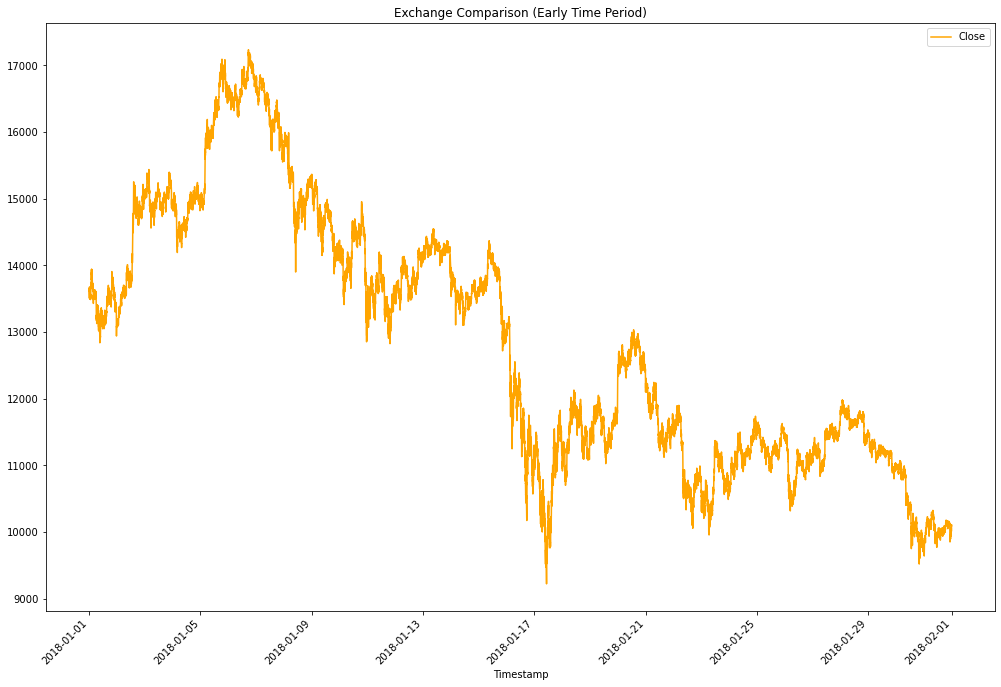

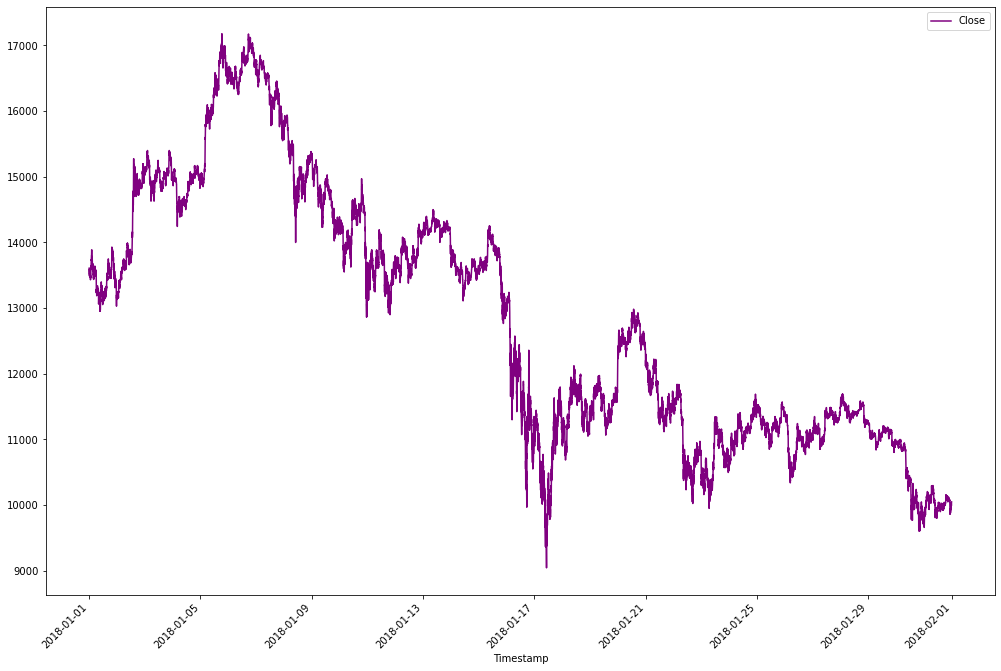

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(
    legend= True, figsize=(17,12), title="Exchange Comparison (Early Time Period)", rot=45, color="orange", label="Bitstamp")

coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(
    legend= True, figsize=(17,12), rot=45, color="purple", label="Coinbase")

<AxesSubplot:xlabel='Timestamp'>

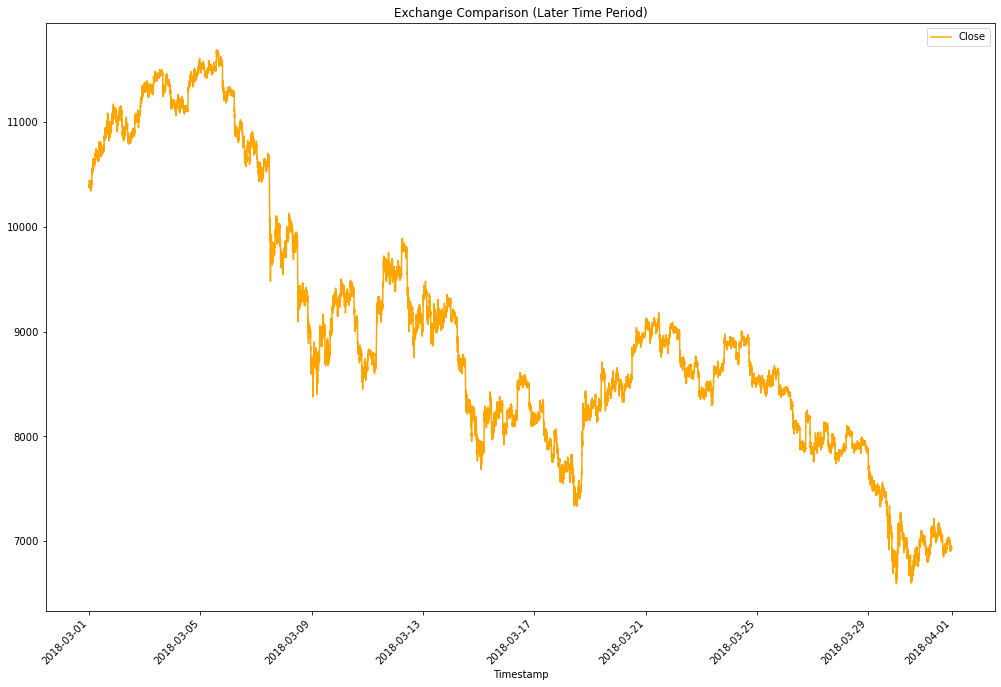

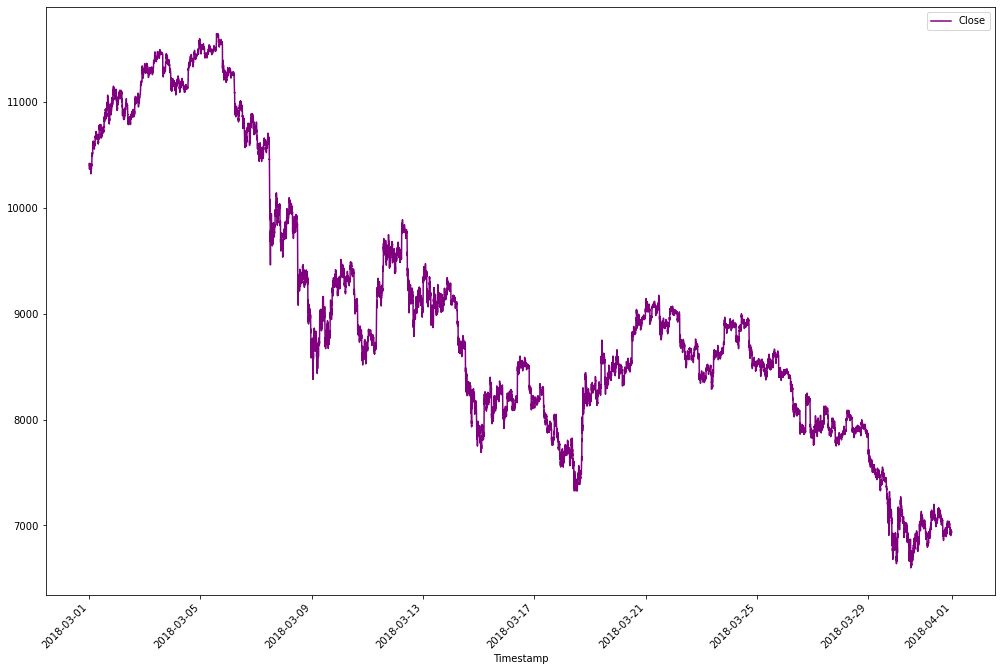

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(
    legend= True, figsize=(17,12), title="Exchange Comparison (Later Time Period)", rot=45, color="orange", label="Bitstamp")

coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(
    legend= True, figsize=(17,12), rot=45, color="purple", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** 

Based on the different time periods the degree of spread not changed over time. # Double check analysis 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:xlabel='Timestamp'>

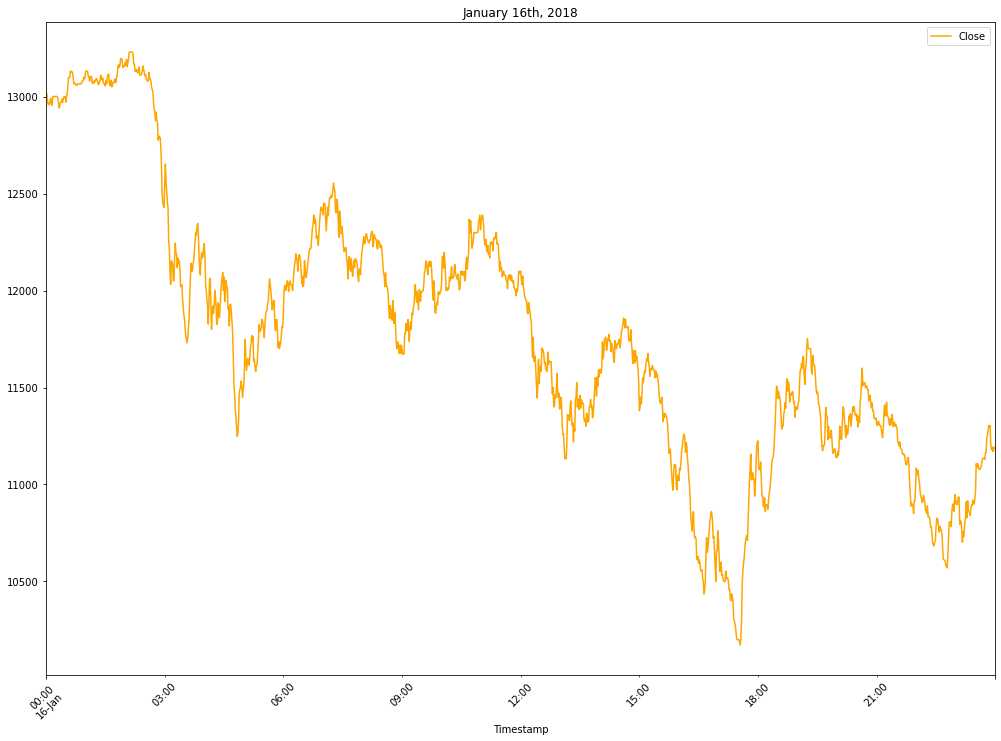

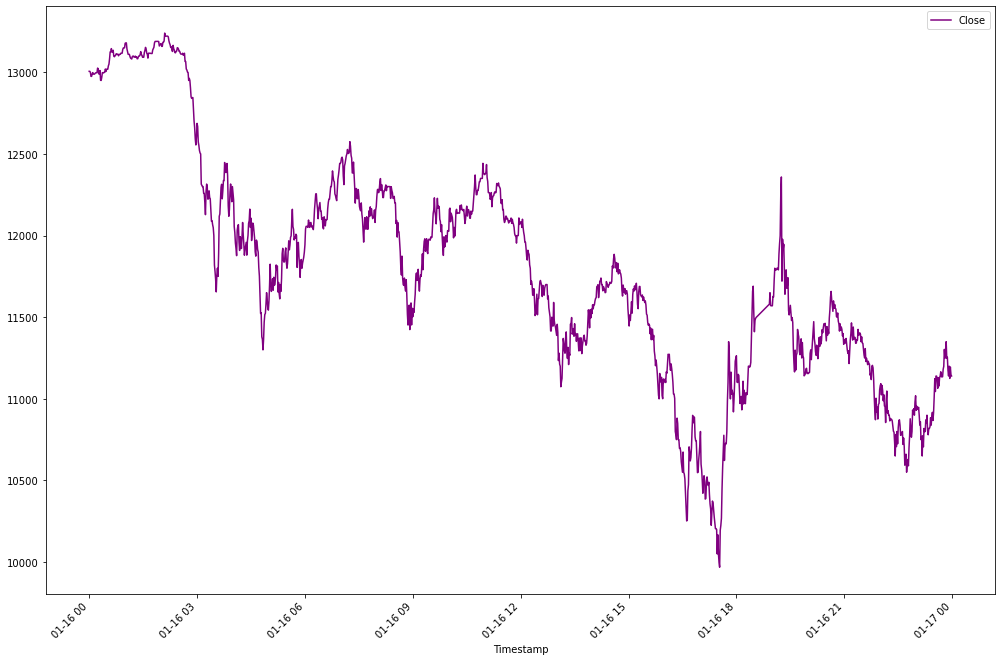

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_early_close= bitstamp_sliced.loc['2018-01-16']
bitstamp_early_close.plot(
    legend= True, figsize=(17,12), title="January 16th, 2018", rot=45, color="orange", label="Bitstamp")

coinbase_early_close= coinbase_sliced.loc['2018-01-16']
coinbase_early_close.plot(
    legend= True, figsize=(17,12), rot=45, color="purple", label="Coinbase")

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_early_close - bitstamp_early_close

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1419.000000
mean,23.212135
std,67.789186
min,-275.920000
25%,-8.330000
50%,22.280000
75%,52.355000
max,606.800000


<AxesSubplot:title={'center':'Aribtrage Spread- January 16th, 2018'}>

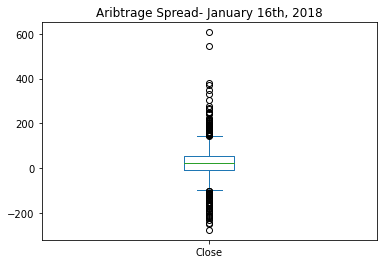

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title= "Aribtrage Spread- January 16th, 2018")

<AxesSubplot:xlabel='Timestamp'>

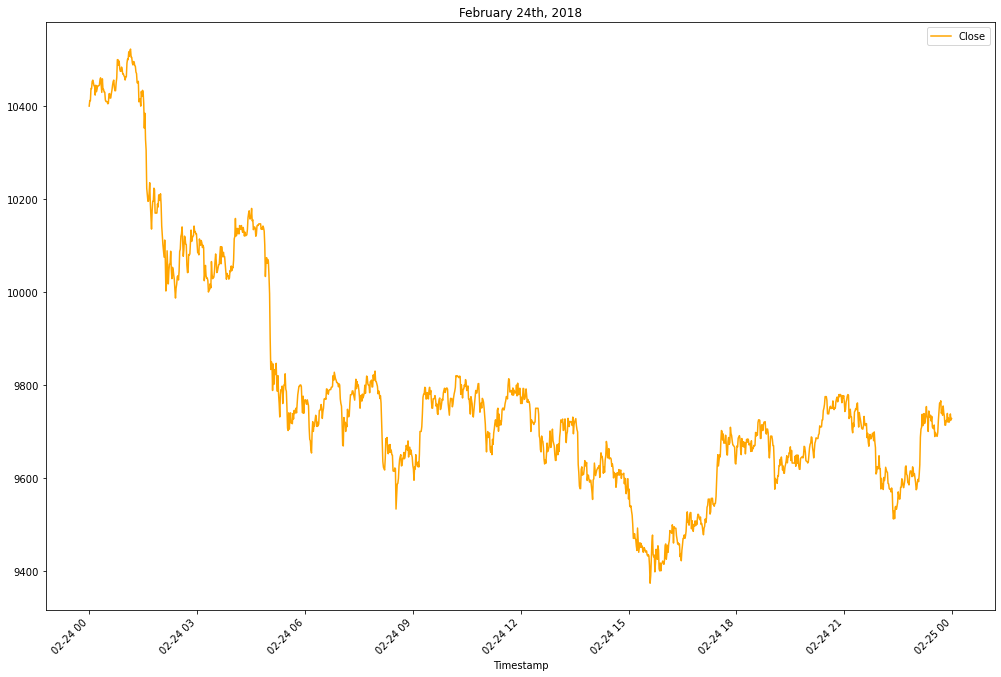

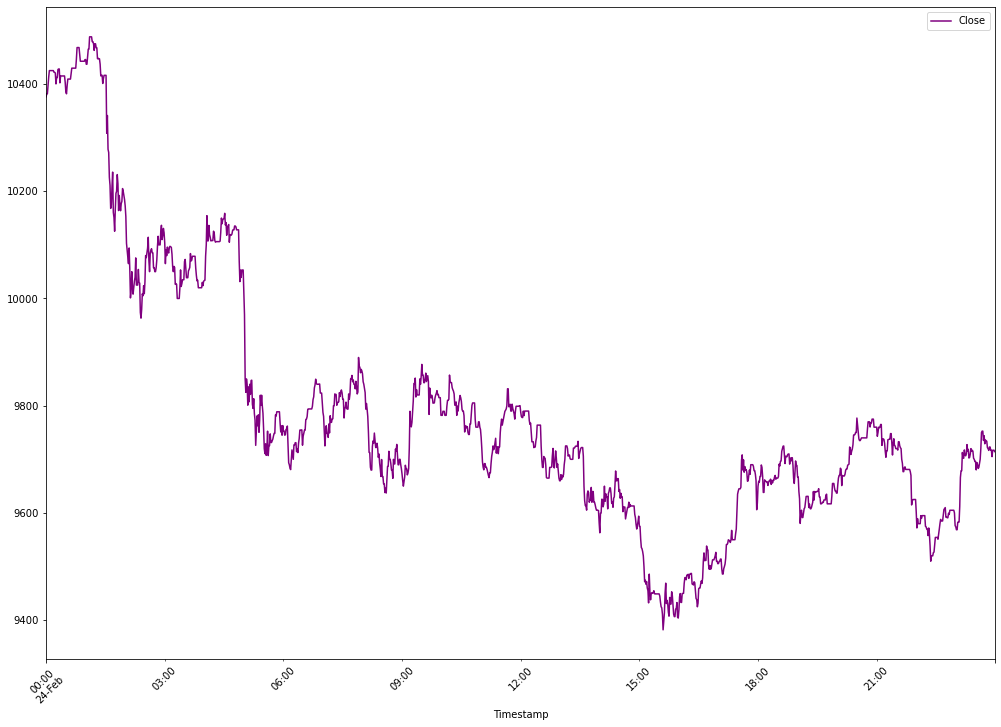

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_middle_close= bitstamp_sliced.loc['2018-02-24']
bitstamp_middle_close.plot(
    legend= True, figsize=(17,12), title="February 24th, 2018", rot=45, color="orange", label="Bitstamp")

coinbase_middle_close= coinbase_sliced.loc['2018-02-24']
coinbase_middle_close.plot(
    legend= True, figsize=(17,12), rot=45, color="purple", label="Coinbase")

In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_middle_close - bitstamp_middle_close

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1437.000000
mean,3.396131
std,22.969472
min,-50.180000
25%,-10.590000
50%,-0.010000
75%,12.120000
max,121.320000


<AxesSubplot:title={'center':'Aribtrage Spread- February 24th, 2018'}>

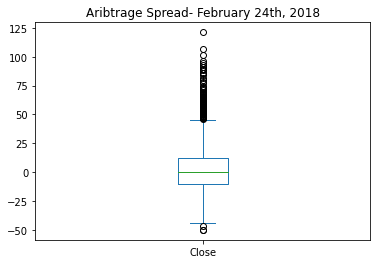

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title= "Aribtrage Spread- February 24th, 2018")

<AxesSubplot:xlabel='Timestamp'>

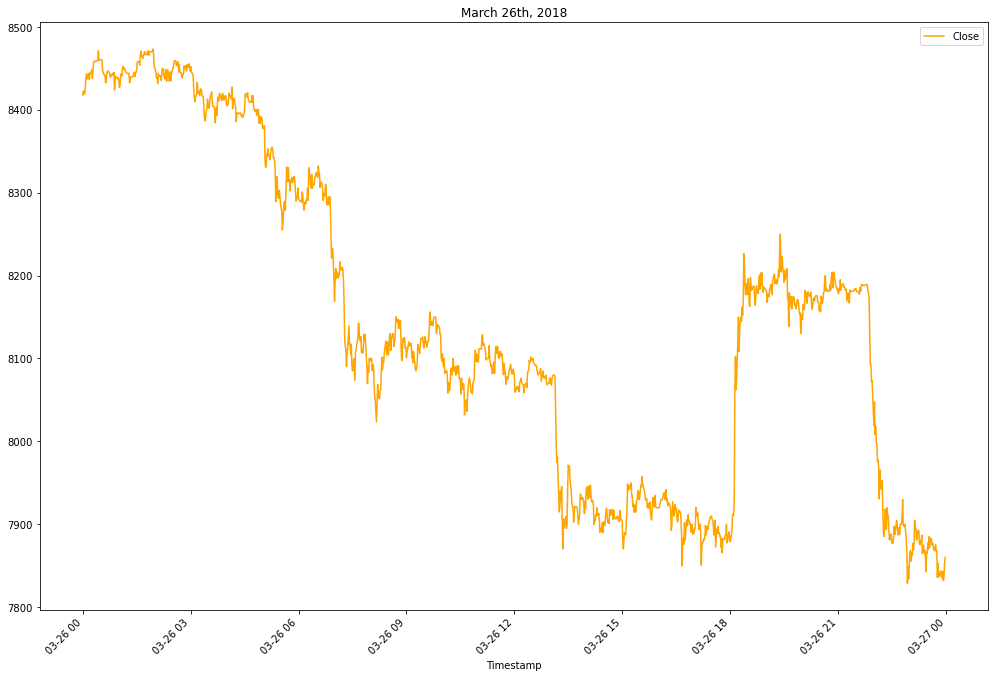

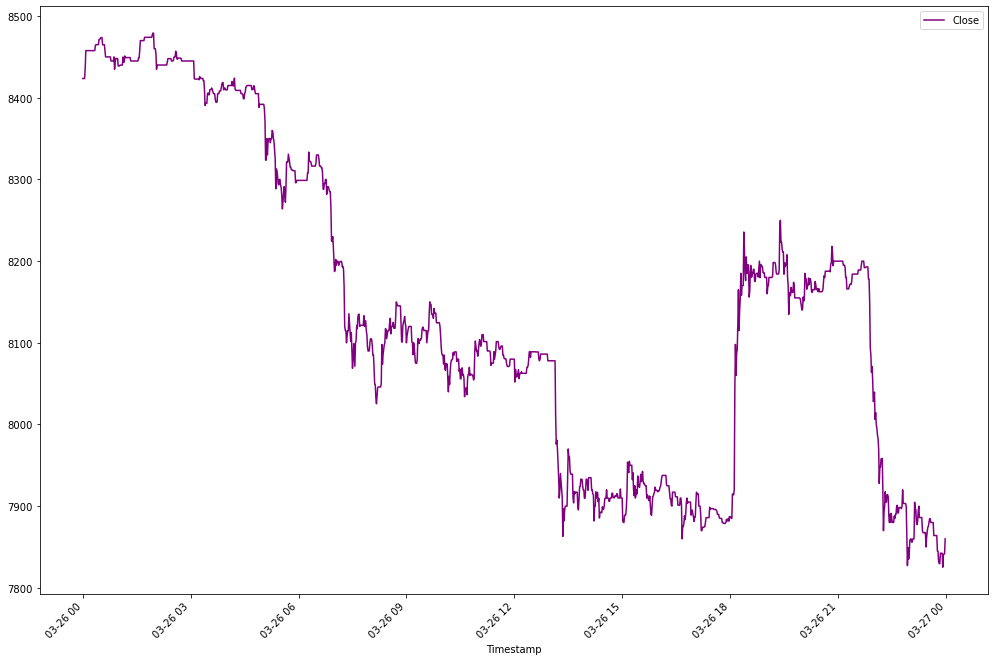

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_late_close= bitstamp_sliced.loc['2018-03-26']
bitstamp_late_close.plot(
    legend= True, figsize=(17,12), title="March 26th, 2018", rot=45, color="orange", label="Bitstamp")

coinbase_late_close= coinbase_sliced.loc['2018-03-26']
coinbase_late_close.plot(
    legend= True, figsize=(17,12), rot=45, color="purple", label="Coinbase")

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_late_close - bitstamp_late_close

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1432.000000
mean,-0.722193
std,8.523060
min,-32.040000
25%,-6.812500
50%,-0.730000
75%,4.965000
max,35.070000


<AxesSubplot:title={'center':'Aribtrage Spread- March 26th, 2018'}>

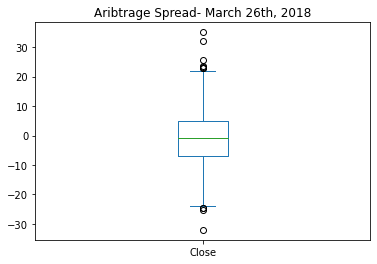

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title= "Aribtrage Spread- March 26th, 2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early= coinbase_early_close.loc['2018-01-16'] - bitstamp_early_close.loc['2018-01-16']
display(arbitrage_spread_early[arbitrage_spread_early > 0].describe())


,Close
count,960.000000
mean,53.405344
std,53.910409
min,0.010000
25%,21.602500
50%,39.885000
75%,68.547500
max,606.800000


In [30]:
#middle
arbitrage_spread_middle= coinbase_middle_close.loc['2018-02-24'] - bitstamp_middle_close.loc['2018-02-24']
display(arbitrage_spread_middle[arbitrage_spread_middle > 0].describe())


,Close
count,713.000000
mean,19.880351
std,20.699851
min,0.010000
25%,5.040000
50%,12.330000
75%,27.250000
max,121.320000


In [31]:
#late 
arbitrage_spread_late= coinbase_late_close.loc['2018-03-26'] - bitstamp_late_close.loc['2018-03-26']
display(arbitrage_spread_late[arbitrage_spread_late > 0].describe())

,Close
count,651.000000
mean,6.689247
std,5.240159
min,0.010000
25%,2.835000
50%,5.230000
75%,9.195000
max,35.070000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [32]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_early_close.loc['2018-01-16']
display(spread_return_early.head(5))


,Close
Timestamp,
2018-01-16 00:00:00,NaN
2018-01-16 00:01:00,NaN
2018-01-16 00:02:00,0.000731
2018-01-16 00:03:00,0.001108
2018-01-16 00:04:00,0.000909


In [33]:
#middle
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0]/ bitstamp_middle_close.loc['2018-02-24']
display(spread_return_middle.head(5))


,Close
Timestamp,
2018-02-24 00:00:00,NaN
2018-02-24 00:01:00,NaN
2018-02-24 00:02:00,NaN
2018-02-24 00:03:00,NaN
2018-02-24 00:04:00,NaN


In [34]:
#late
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_late_close.loc['2018-03-26']
display(spread_return_late.head(5))


,Close
Timestamp,
2018-03-26 00:00:00,0.000738
2018-03-26 00:01:00,0.000122
2018-03-26 00:02:00,0.000470
2018-03-26 00:03:00,0.000576
2018-03-26 00:04:00,0.001395


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [35]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
display(profitable_trades_early)

,Close
Timestamp,
2018-01-16 00:00:00,NaN
2018-01-16 00:01:00,NaN
2018-01-16 00:02:00,NaN
2018-01-16 00:03:00,NaN
2018-01-16 00:04:00,NaN
...,...
2018-01-16 23:55:00,NaN
2018-01-16 23:56:00,NaN
2018-01-16 23:57:00,NaN


In [36]:
#middle
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
display(profitable_trades_middle)

,Close
Timestamp,
2018-02-24 00:00:00,NaN
2018-02-24 00:01:00,NaN
2018-02-24 00:02:00,NaN
2018-02-24 00:03:00,NaN
2018-02-24 00:04:00,NaN
...,...
2018-02-24 23:55:00,NaN
2018-02-24 23:56:00,NaN
2018-02-24 23:57:00,NaN


In [37]:
#late
profitable_trades_late = spread_return_late[spread_return_late > 0.01]
display(profitable_trades_late)

,Close
Timestamp,
2018-03-26 00:00:00,NaN
2018-03-26 00:01:00,NaN
2018-03-26 00:02:00,NaN
2018-03-26 00:03:00,NaN
2018-03-26 00:04:00,NaN
...,...
2018-03-26 23:55:00,NaN
2018-03-26 23:56:00,NaN
2018-03-26 23:57:00,NaN


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [38]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())


,Close
count,73.000000
mean,0.016720
std,0.007628
min,0.010109
25%,0.012061
50%,0.014794
75%,0.018124
max,0.051633


,Close
count,3.000000
mean,0.011377
std,0.001199
min,0.010431
25%,0.010703
50%,0.010974
75%,0.011850
max,0.012726


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [39]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_early= profitable_trades_early * bitstamp_early_close
profit_per_trade_middle= profitable_trades_middle * bitstamp_middle_close
profit_per_trade_late= profitable_trades_late * bitstamp_late_close


In [40]:
# Drop any missing values from the profit DataFrame
profit_per_trade_early.dropna()
profit_per_trade_middle.dropna()
profit_per_trade_late.dropna()


,Close
Timestamp,


In [41]:
# View the early profit DataFrame
display(profit_per_trade_early)
display(profit_per_trade_middle)
display(profit_per_trade_late)

,Close
Timestamp,
2018-01-16 00:00:00,NaN
2018-01-16 00:01:00,NaN
2018-01-16 00:02:00,NaN
2018-01-16 00:03:00,NaN
2018-01-16 00:04:00,NaN
...,...
2018-01-16 23:55:00,NaN
2018-01-16 23:56:00,NaN
2018-01-16 23:57:00,NaN


,Close
Timestamp,
2018-02-24 00:00:00,NaN
2018-02-24 00:01:00,NaN
2018-02-24 00:02:00,NaN
2018-02-24 00:03:00,NaN
2018-02-24 00:04:00,NaN
...,...
2018-02-24 23:55:00,NaN
2018-02-24 23:56:00,NaN
2018-02-24 23:57:00,NaN


,Close
Timestamp,
2018-03-26 00:00:00,NaN
2018-03-26 00:01:00,NaN
2018-03-26 00:02:00,NaN
2018-03-26 00:03:00,NaN
2018-03-26 00:04:00,NaN
...,...
2018-03-26 23:55:00,NaN
2018-03-26 23:56:00,NaN
2018-03-26 23:57:00,NaN


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [42]:
# Generate the summary statistics for the early profit per trade DataFrame
#early
profit_per_trade_early.describe()

,Close
count,73.000000
mean,193.796849
std,88.701429
min,112.520000
25%,139.420000
50%,171.310000
75%,210.060000
max,606.800000


In [43]:
#middle
profit_per_trade_middle.describe()

,Close
count,3.000000
mean,110.023333
std,10.129246
min,101.750000
25%,104.375000
50%,107.000000
75%,114.160000
max,121.320000


In [44]:
#late
profit_per_trade_late.describe()

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:title={'center':'Profit Per Trade- January 16th, 2018'}, xlabel='Timestamp'>

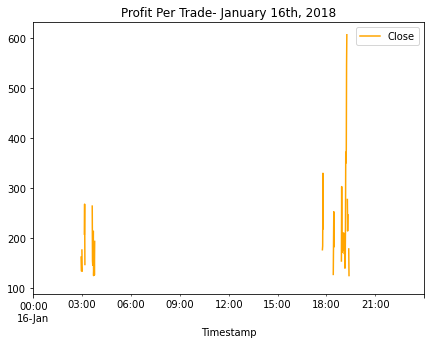

In [45]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(
    legend= True,figsize=(7,5), title= "Profit Per Trade- January 16th, 2018", color="orange")

<AxesSubplot:title={'center':'Profit Per Trade- February 24th, 2018 '}, xlabel='Timestamp'>

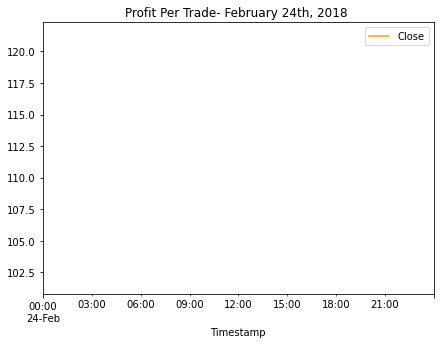

In [46]:
#middle profit
profit_per_trade_middle.plot(
    legend= True, figsize=(7,5), title="Profit Per Trade- February 24th, 2018 ", color="orange")

<AxesSubplot:title={'center':'Profit Per Trade- March 26th, 2018 '}, xlabel='Timestamp'>

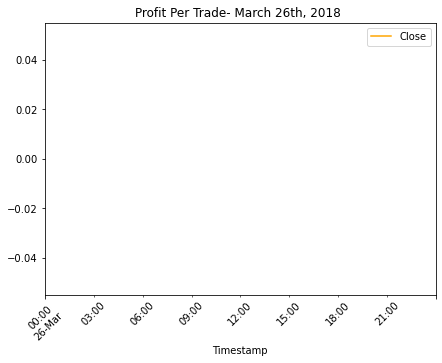

In [47]:
#late profit
profit_per_trade_late.plot(
    legend= True, figsize=(7,5), title="Profit Per Trade- March 26th, 2018 ", rot=45, color="orange")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [48]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
#early
sum_profit_per_trade_early= profit_per_trade_early.sum()
sum_profit_per_trade_early

Close    14147.17
dtype: float64

In [49]:
#middle
sum_profit_per_trade_middle= profit_per_trade_middle.sum()
sum_profit_per_trade_middle

Close    330.07
dtype: float64

In [50]:
#late
sum_profit_per_trade_late= profit_per_trade_late.sum()
sum_profit_per_trade_late

Close    0.0
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [51]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early= profit_per_trade_early.cumsum()

cumulative_profit_middle= profit_per_trade_middle.cumsum()

cumulative_profit_late= profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Profite- January 16th, 2018'}, xlabel='Timestamp'>

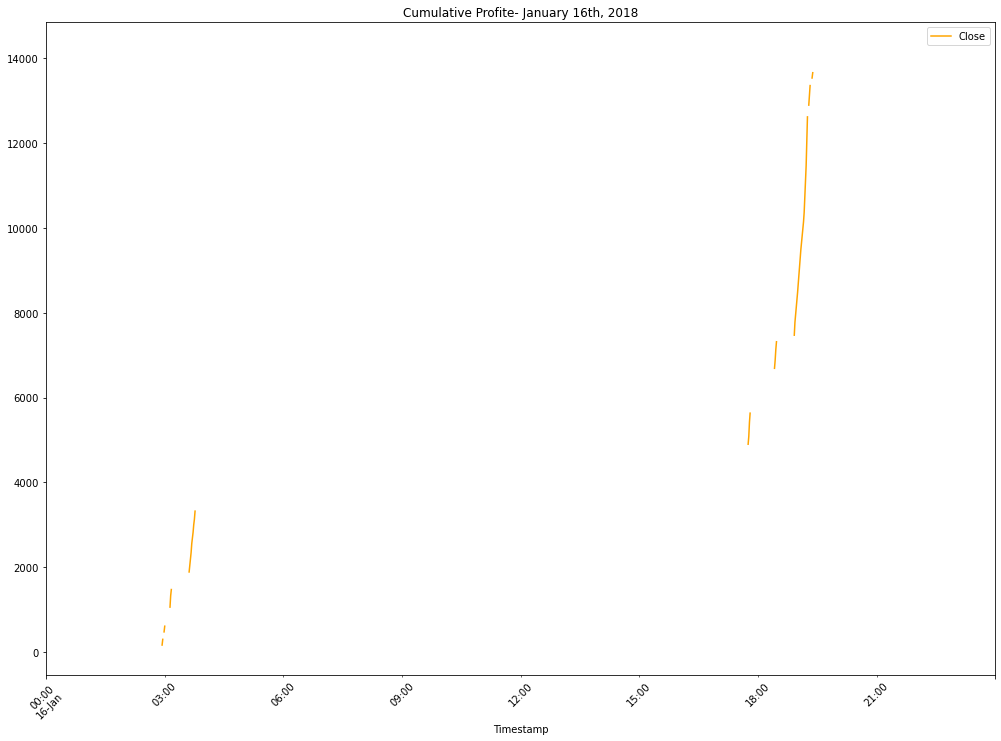

In [52]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(
    legend= True, figsize=(17,12), title="Cumulative Profite- January 16th, 2018", rot=45, color="orange")


<AxesSubplot:title={'center':'Cumulative Profit- February 24th, 2018'}, xlabel='Timestamp'>

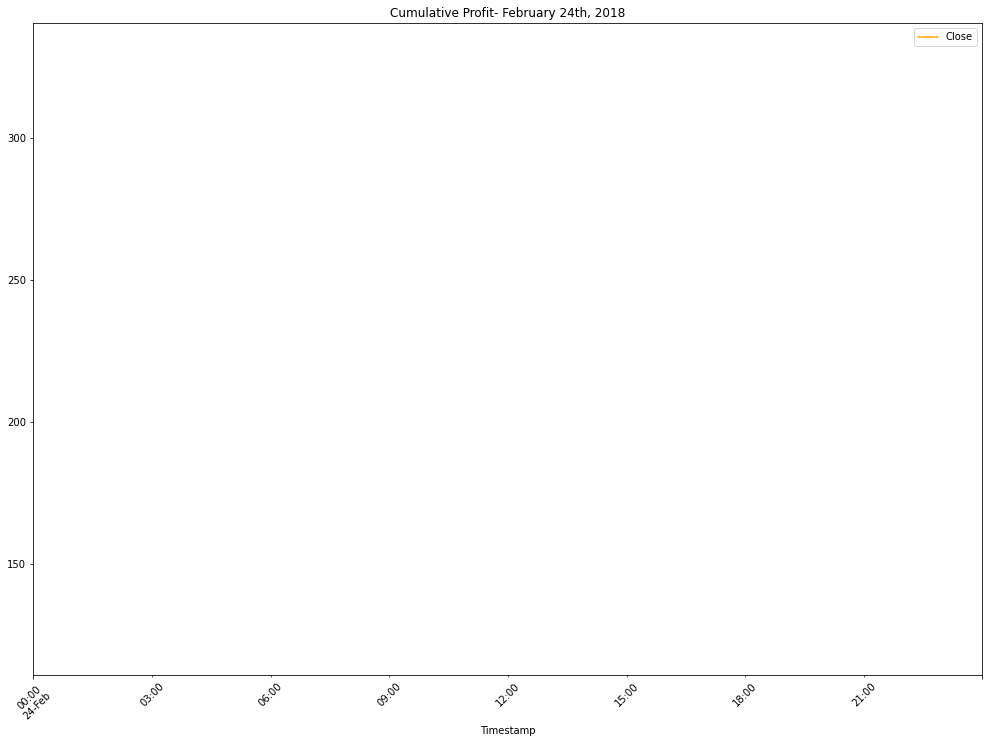

In [53]:
#middle profit
cumulative_profit_middle.plot(
    legend= True, figsize=(17,12), title="Cumulative Profit- February 24th, 2018", rot=45, color="orange")

<AxesSubplot:title={'center':'Cumulative Profit- March 26th, 2018'}, xlabel='Timestamp'>

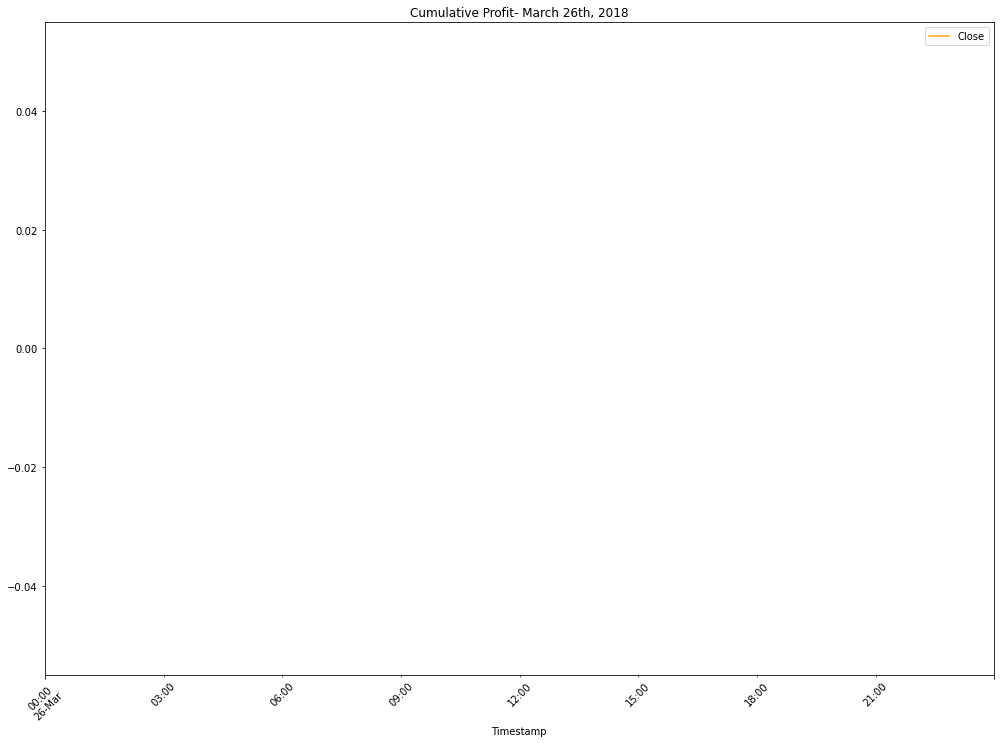

In [54]:
#late profit 
cumulative_profit_late.plot(
    legend= True, figsize=(17,12), title="Cumulative Profit- March 26th, 2018", rot=45, color="orange")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:**
Based on the data, it seems that profit can be made during the early time period. Information for this observation was made using the numbers and data since the graphs are not displaying properly. 
